# Prediction of Wine Data Set 

In [1]:
#!pip install --user scikit-learn

In [2]:
#!pip install tensorflow

In [3]:
##1-Upgrade tensorflow:
#!pip install --user --upgrade tensorflow-gpu

In [4]:
## 2-Upgrade Tensorboard
#!pip install --user --upgrade tensorboard

In [5]:
## 3-Downgrade Keras
#pip install keras==2.3.1

In [6]:
# 4-Downgrade tensorflow-gpu
#pip install --user --upgrade tensorflow-gpu==1.14.0

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklean Packages for Prediction
from sklearn import datasets

# For Splitting Data 
from sklearn.model_selection import train_test_split

# Scaling Data 
from sklearn.preprocessing import StandardScaler

# Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# For Comparing Accuracies Across Different Models
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [9]:
import warnings
warnings.filterwarnings("ignore")

## Read in Data 

In [10]:
red_dataset = pd.read_csv('winequality-red.csv', sep=';')
white_dataset = pd.read_csv('winequality-white.csv', sep=';')


#red & white data merged
wine = pd.concat([red_dataset, white_dataset])

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [12]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Finding Correlation 


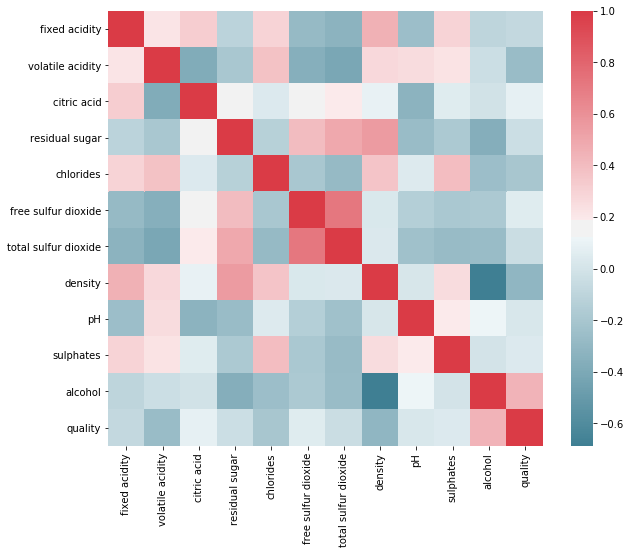

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Pearson Correlation

In [14]:
pearson_correlation = wine.corr(method ='pearson')
pearson_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [15]:
# Find the top 3 correlation values for quality, exclude the top equal to 1, correlation with itself is always 1
# quality corr with quality = 1 , exclude this
quality_p = pearson_correlation['quality']
quality_p.nlargest(4)

quality                1.000000
alcohol                0.444319
citric acid            0.085532
free sulfur dioxide    0.055463
Name: quality, dtype: float64

In [16]:
# What about finding top 3 most negative correlation?
quality_p = pearson_correlation['quality']
quality_p.nsmallest(3)

density            -0.305858
volatile acidity   -0.265699
chlorides          -0.200666
Name: quality, dtype: float64

## Spearman Correlation 

In [17]:
spearman_correlation = wine.corr(method ='spearman')
spearman_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.200272,0.270568,-0.032254,0.355964,-0.259914,-0.233259,0.434056,-0.250044,0.220145,-0.110650,-0.098154
volatile acidity,0.200272,1.000000,-0.295129,-0.064384,0.415896,-0.365673,-0.343534,0.261437,0.194876,0.255042,-0.023924,-0.257806
citric acid,0.270568,-0.295129,1.000000,0.074920,-0.074084,0.122058,0.159355,0.065690,-0.285905,0.036898,0.019653,0.105711
residual sugar,-0.032254,-0.064384,0.074920,1.000000,-0.035800,0.387750,0.454886,0.526664,-0.229344,-0.138157,-0.329218,-0.016891
chlorides,0.355964,0.415896,-0.074084,-0.035800,1.000000,-0.260421,-0.268434,0.590729,0.163528,0.370450,-0.401270,-0.295054
free sulfur dioxide,-0.259914,-0.365673,0.122058,0.387750,-0.260421,1.000000,0.741438,0.005841,-0.164699,-0.221062,-0.186046,0.086865
total sulfur dioxide,-0.233259,-0.343534,0.159355,0.454886,-0.268434,0.741438,1.000000,0.061540,-0.242719,-0.256745,-0.308982,-0.054777
density,0.434056,0.261437,0.065690,0.526664,0.590729,0.005841,0.061540,1.000000,0.011777,0.274792,-0.699442,-0.322806
pH,-0.250044,0.194876,-0.285905,-0.229344,0.163528,-0.164699,-0.242719,0.011777,1.000000,0.254263,0.140225,0.032538
sulphates,0.220145,0.255042,0.036898,-0.138157,0.370450,-0.221062,-0.256745,0.274792,0.254263,1.000000,0.004583,0.029831


In [18]:
quality_p = pearson_correlation['quality']
quality_p.nlargest(4)

quality                1.000000
alcohol                0.444319
citric acid            0.085532
free sulfur dioxide    0.055463
Name: quality, dtype: float64

In [19]:
quality_p.nlargest(4)

quality                1.000000
alcohol                0.444319
citric acid            0.085532
free sulfur dioxide    0.055463
Name: quality, dtype: float64

In [20]:
# What about finding top 3 most negative correlation?
quality_p = pearson_correlation['quality']
quality_p.nsmallest(3)

density            -0.305858
volatile acidity   -0.265699
chlorides          -0.200666
Name: quality, dtype: float64

## Kendall Correlation

In [21]:
kendall_correlation = wine.corr(method ='kendall')
kendall_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.134082,0.190290,-0.018808,0.249126,-0.177936,-0.153720,0.303833,-0.172497,0.152473,-0.074303,-0.075990
volatile acidity,0.134082,1.000000,-0.201494,-0.053017,0.281802,-0.248022,-0.223240,0.174296,0.135709,0.173354,-0.013494,-0.199101
citric acid,0.190290,-0.201494,1.000000,0.052812,-0.050553,0.087468,0.112589,0.041026,-0.198630,0.023656,0.013566,0.082160
residual sugar,-0.018808,-0.053017,0.052812,1.000000,-0.017854,0.263818,0.305388,0.382221,-0.159924,-0.092279,-0.226004,-0.013097
chlorides,0.249126,0.281802,-0.050553,-0.017854,1.000000,-0.170156,-0.151690,0.414107,0.110776,0.259475,-0.275747,-0.228872
free sulfur dioxide,-0.177936,-0.248022,0.087468,0.263818,-0.170156,1.000000,0.559478,0.001132,-0.111764,-0.150723,-0.123386,0.066713
total sulfur dioxide,-0.153720,-0.223240,0.112589,0.305388,-0.151690,0.559478,1.000000,0.050936,-0.163244,-0.164785,-0.206316,-0.042283
density,0.303833,0.174296,0.041026,0.382221,0.414107,0.001132,0.050936,1.000000,0.008425,0.188499,-0.521495,-0.247978
pH,-0.172497,0.135709,-0.198630,-0.159924,0.110776,-0.111764,-0.163244,0.008425,1.000000,0.174444,0.096921,0.025223
sulphates,0.152473,0.173354,0.023656,-0.092279,0.259475,-0.150723,-0.164785,0.188499,0.174444,1.000000,0.008588,0.023679


In [22]:
# Find the top 3 positive correlation values for quality, exclude the top equal to 1, correlation with itself is always 1
# quality corr with quality = 1 , exclude this

quality_k = kendall_correlation['quality']
quality_k.nlargest(4)

quality                1.000000
alcohol                0.352430
citric acid            0.082160
free sulfur dioxide    0.066713
Name: quality, dtype: float64

In [23]:
# What about finding top 3 most negative correlation?
quality_k = kendall_correlation['quality']
quality_k.nsmallest(4)


density            -0.247978
chlorides          -0.228872
volatile acidity   -0.199101
fixed acidity      -0.075990
Name: quality, dtype: float64

## Plotting Quality Against Individual Components 

### Top 3 BEST

[Text(0.5, 1.0, 'Quality vs Alcohol')]

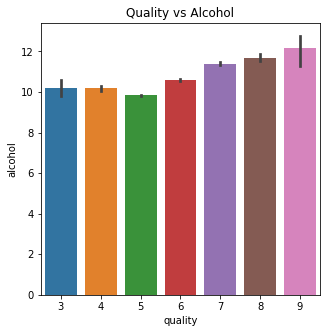

In [24]:
#Quality vs Alcohol
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "alcohol",data = wine).set(title='Quality vs Alcohol')

[Text(0.5, 1.0, 'Quality vs pH')]

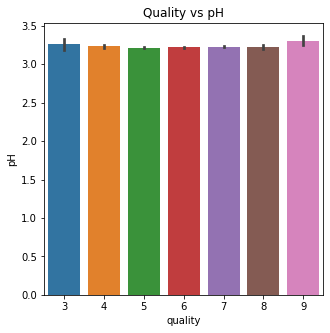

In [25]:
#Quality vs pH
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "pH",data = wine).set(title='Quality vs pH')

[Text(0.5, 1.0, 'Quality vs Suplhates')]

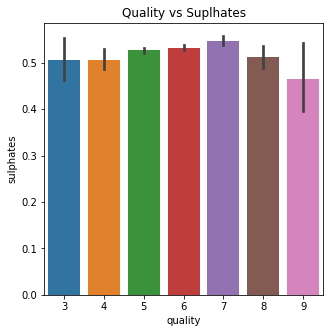

In [26]:
#Quality vs Suplhates
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "sulphates",data = wine).set(title='Quality vs Suplhates')

### Top 3 Worst 

[Text(0.5, 1.0, 'Quality vs Density')]

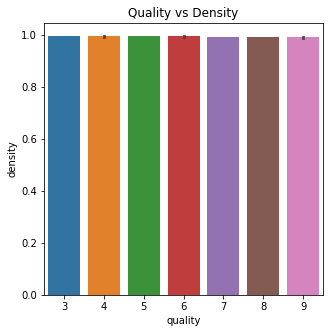

In [27]:
#Quality vs Density
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "density",data = wine).set(title='Quality vs Density')

[Text(0.5, 1.0, 'Quality vs Chlorides')]

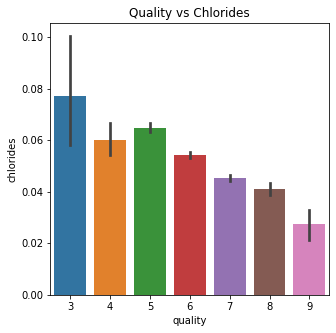

In [28]:
#Quality vs Chlorides
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "chlorides",data = wine).set(title='Quality vs Chlorides')

[Text(0.5, 1.0, 'Quality vs Volatile Acidity')]

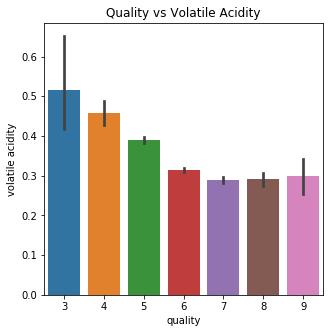

In [29]:
#Quality vs Volatile Acidity
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "volatile acidity",data = wine).set(title='Quality vs Volatile Acidity')

## Unique Values for Quality 

In [30]:
#What are the unique values for the quality ranking
unique_values = wine.quality.unique()
unique_values.sort()


In [31]:
unique_values 

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [32]:
numFeatures = len(unique_values)
numFeatures

7

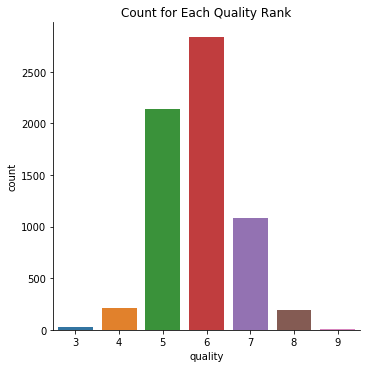

In [33]:
sns.catplot(x = 'quality', data = wine, kind = 'count').set(title='Count for Each Quality Rank')


## Preparing Data: Assigning Value Quality to Binary 0-1 for Training 

In [34]:
# Quality Values are given from 1-10, and we want to classify things from good and bad, 

In [35]:
good = wine.quality > 5
bad = wine.quality <= 5
column_name = 'quality'
wine.loc[good, column_name] = 1
wine.loc[bad, column_name] = 0

In [36]:
good_count = wine['quality'].sum()
bad_count = len(wine['quality']) - good_count
print("Good Wines: ", good_count)
print("Bad Wines: ", bad_count)


Good Wines:  4113
Bad Wines:  2384


[Text(0.5, 1.0, 'Count of Bad Wines vs Good Wines')]

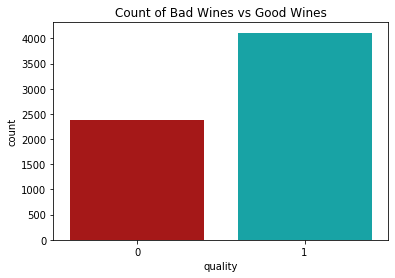

In [37]:
sns.countplot(wine['quality'],palette=['#bd0000',"#00babd"]).set(title='Count of Bad Wines vs Good Wines')

##  Creating training/testing sets

In [38]:
#divide the dataset into dependent and independent variables
x = wine.iloc[:,:11]
y = wine.iloc[:,11]
# Shape of x and y.
print(x.shape)
print(y.shape)

(6497, 11)
(6497,)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
# Shape of train and test set
print("Training Shape: ")
print("X Train: ", x_train.shape)
print("Y Train: ", y_train.shape)
print("")
print("Testing Shape: ")
print("X test: ", x_test.shape)
print("Y test: ", y_test.shape)

Training Shape: 
X Train:  (4872, 11)
Y Train:  (4872,)

Testing Shape: 
X test:  (1625, 11)
Y test:  (1625,)


In [40]:
# standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Modeling 

In [113]:
#When implementing sklean packages once calling the algorithm we simply print out these stats

def model_stats(model):
    #input training model into the model
    model.fit(x_train, y_train)
    #predicting from test set
    y_pred = model.predict(x_test)
    # calculating the train and test accuracies
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)  
    print("Training accuracy :",train_accuracy)
    print("Testing accuracy :",test_accuracy)
    print("")
    
    # confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(c_matrix)
    print("")
    
    #cross validation
    model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
    model_eval_mean = model_eval.mean()
    print("Cross Validation: ", model_eval_mean)
    print("")
    
    # classification report
    classification_Report = classification_report(y_test, y_pred)
    print("Classification Report: ")
    print(classification_Report)
    
    return train_accuracy, test_accuracy, model_eval_mean

In [125]:
def table_data(model):
    #input training model into the model
    model.fit(x_train, y_train)
    #predicting from test set
    y_pred = model.predict(x_test)
    # calculating the train and test accuracies
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)  
    #cross validation
    model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
    model_eval_mean = model_eval.mean()
    return train_accuracy, test_accuracy, model_eval_mean

## Logistic Regression 

Logistic Regression outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.

Each of the features also has a label of only 0 or 1. Logistic regression is a linear classifier and therefore used when there is some sort of linear relationship between the data.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

#model
model = LogisticRegression()
model_stats(model)

Training accuracy : 0.7354269293924466
Testing accuracy : 0.4086153846153846

Confusion Matrix: 
[[513  97]
 [864 151]]

Cross Validation:  0.7329539334163665

Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.84      0.52       610
           1       0.61      0.15      0.24      1015

    accuracy                           0.41      1625
   macro avg       0.49      0.49      0.38      1625
weighted avg       0.52      0.41      0.34      1625



(0.7354269293924466, 0.4086153846153846, 0.7329539334163665)

## Stochastic Gradient Descent Classifier

In [115]:
from sklearn.linear_model import SGDClassifier

#model
model = SGDClassifier(penalty=None)
model_stats(model)

Training accuracy : 0.7220853858784894
Testing accuracy : 0.4104615384615385

Confusion Matrix: 
[[548  62]
 [896 119]]

Cross Validation:  0.7136735449557343

Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.90      0.53       610
           1       0.66      0.12      0.20      1015

    accuracy                           0.41      1625
   macro avg       0.52      0.51      0.37      1625
weighted avg       0.55      0.41      0.32      1625



(0.7220853858784894, 0.4104615384615385, 0.7136735449557343)

## Decision Forest 

A Decision Tree Classifier functions by breaking down a dataset into smaller and smaller subsets based on different criteria. Different sorting criteria will be used to divide the dataset, with the number of examples getting smaller with every division.

Once the network has divided the data down to one example, the example will be put into a class that corresponds to a key. When multiple random forest classifiers are linked together they are called Random Forest Classifiers.

In [116]:
from sklearn.tree import DecisionTreeClassifier

# model 
model = DecisionTreeClassifier()
model_stats(model)

Training accuracy : 1.0
Testing accuracy : 0.3710769230769231

Confusion Matrix: 
[[ 601    9]
 [1013    2]]

Cross Validation:  0.7662032517588447

Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.99      0.54       610
           1       0.18      0.00      0.00      1015

    accuracy                           0.37      1625
   macro avg       0.28      0.49      0.27      1625
weighted avg       0.25      0.37      0.21      1625



(1.0, 0.3710769230769231, 0.7662032517588447)

## Random Forest 


In [117]:
from sklearn.ensemble import RandomForestClassifier

#model
model = RandomForestClassifier(n_estimators = 200)
model_stats(model)

Training accuracy : 1.0
Testing accuracy : 0.464

Confusion Matrix: 
[[358 252]
 [619 396]]

Cross Validation:  0.8220322651226984

Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.59      0.45       610
           1       0.61      0.39      0.48      1015

    accuracy                           0.46      1625
   macro avg       0.49      0.49      0.46      1625
weighted avg       0.52      0.46      0.47      1625



(1.0, 0.464, 0.8220322651226984)

## Niave Bayes 

In [118]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model_stats(model)

Training accuracy : 0.6759031198686372
Testing accuracy : 0.38769230769230767

Confusion Matrix: 
[[579  31]
 [964  51]]

Cross Validation:  0.6723996027872219

Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.95      0.54       610
           1       0.62      0.05      0.09      1015

    accuracy                           0.39      1625
   macro avg       0.50      0.50      0.32      1625
weighted avg       0.53      0.39      0.26      1625



(0.6759031198686372, 0.38769230769230767, 0.6723996027872219)

### KNN K nearest neighbors

K-Nearest Neighbors operates by checking the distance from some test example to the known values of some training example. The group of data points/class that would give the smallest distance between the training points and the testing point is the class that is selected.

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
# This function will run through a given number of neighbors and find
# which number of neighbors gives the best accuracy
def kNN_best(num):
    scores = []
    for i in range(2,num):
        kNN = KNeighborsClassifier(n_neighbors = i)
        kNN.fit(x_train, y_train)
        cross_val = cross_val_score(estimator=kNN, X=x_train, y=y_train, cv=10)
        scores.append(cross_val.mean())
    
    index = [i for i, e in enumerate(scores) if e == max(scores)]
    best_n_neighbor = index[0] + 2
    
    kNN = KNeighborsClassifier(n_neighbors = best_n_neighbor)
    
    print('Best number of neighbors was ', best_n_neighbor)
    print("")
    
    model_stats(kNN)

    

In [121]:
# In general more numbers of neighbors will give be too broad. Do not need to exceed 10. 
max_num_neighbors = 10 

# This will return the best accuracy for the best number of neighbors. 
kNN_best(max_num_neighbors)

Best number of neighbors was  9

Training accuracy : 0.8066502463054187
Testing accuracy : 0.3667692307692308

Confusion Matrix: 
[[546  64]
 [965  50]]

Cross Validation:  0.76107020230922

Classification Report: 
              precision    recall  f1-score   support

           0       0.36      0.90      0.51       610
           1       0.44      0.05      0.09      1015

    accuracy                           0.37      1625
   macro avg       0.40      0.47      0.30      1625
weighted avg       0.41      0.37      0.25      1625



### Finding Best Model 



SGD: 0.588828 (0.113500)
R Forest: 0.819568 (0.025596)
D Tree: 0.759836 (0.024149)
NB: 0.675475 (0.028253)
KNN: 0.678562 (0.020831)
LR: 0.731720 (0.026293)


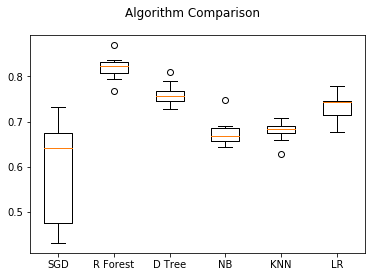

In [123]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SGD', SGDClassifier()))
models.append(('R Forest', RandomForestClassifier()))
models.append(('D Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Table of Results

In [136]:
def table_Results():
    SGD = SGDClassifier()
    RF = RandomForestClassifier()
    DT = DecisionTreeClassifier()
    NB = GaussianNB()
    KNN = KNeighborsClassifier()
    LR = LogisticRegression()
    
    name_title = ['Model', 'Train Accuracy', 'Test Accuracy', 'Model Evaluation Mean']
    train_accuracy_SGD, test_accuracy_SGD, model_eval_mean_SGD = table_data(SGD)
    SGD_list = ['Stochiastic Gradient Descent', train_accuracy_SGD, test_accuracy_SGD, model_eval_mean_SGD]
    train_accuracy_RF, test_accuracy_RF, model_eval_mean_RF = table_data(RF)
    RF_list = ['Random Forrest', train_accuracy_RF, test_accuracy_RF, model_eval_mean_RF]
    train_accuracy_DT, test_accuracy_DT, model_eval_mean_DT = table_data(DT)
    DT_list = ['Decision Tree', train_accuracy_DT, test_accuracy_DT, model_eval_mean_DT]    
    train_accuracy_NB, test_accuracy_NB, model_eval_mean_NB = table_data(NB)
    NB_list = ['Niave Bayes', train_accuracy_NB, test_accuracy_NB, model_eval_mean_NB]
    train_accuracy_KNN, test_accuracy_KNN, model_eval_mean_KNN = table_data(KNN)
    KNN_list = ['K Nearest Neighbor', train_accuracy_KNN, test_accuracy_KNN, model_eval_mean_KNN]
    train_accuracy_LR, test_accuracy_LR, model_eval_mean_LR = table_data(LR)
    LR_list = ['Logistic Regression', train_accuracy_LR, test_accuracy_LR, model_eval_mean_LR]
    
    df = pd.DataFrame([SGD_list, RF_list, DT_list, NB_list, KNN_list, LR_list], columns = name_title)

    return df

In [137]:
table_Results()

,Model,Train Accuracy,Test Accuracy,Model Evaluation Mean
0,Stochiastic Gradient Descent,0.720443,0.414769,0.716945
1,Random Forrest,1.000000,0.497846,0.821415
2,Decision Tree,1.000000,0.376615,0.767024
3,Niave Bayes,0.675903,0.387692,0.672400
4,K Nearest Neighbor,0.838054,0.374769,0.757377
5,Logistic Regression,0.735427,0.408615,0.732954
